# Hepsiburada veri analizi / Levent Aslan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import faiss
from sklearn.decomposition import TruncatedSVD
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_json(r"C:\Users\kurt_\Desktop\hepsiburada\datav4\all_products_2934984.json")
df.head()

,model,title,price,rating,evaluation,category_url,product_url,category,supercategory
0,Elfobaby,Eğlenceli Köpüklü Yengeç Banyo Aktivite Oyuncağı - TEST RAPORLU,"349,30 TL","3,8",(24),https://www.hepsiburada.com/aktivite-merkezi-c-80382017?sayfa=1,https://www.hepsiburada.com/eglenceli-kopuklu-yengec-banyo-aktivite-oyuncagi-pm-HBC00006VEGHP,Aktivite Merkezi,Bebek Aktivite ve Eğlence
1,Moniev,Çocuk Oyun Etkinlik Çalışma Masası Montessori Sandalyeli,"1.495,25 TL","4,7",(116),https://www.hepsiburada.com/aktivite-merkezi-c-80382017?sayfa=1,https://www.hepsiburada.com/moniev-cocuk-oyun-etkinlik-calisma-masasi-montessori-sandalyeli-p-HBCV000046C332,Aktivite Merkezi,Bebek Aktivite ve Eğlence
2,Dynavica,Renkli Halkalar Iç Içe Geçirme Oyunu,339 TL,N/A,N/A,https://www.hepsiburada.com/aktivite-merkezi-c-80382017?sayfa=1,https://adservice.hepsiburada.com/event/api/v1/track?event=bURVQWRvWVFNL1RvYk1aeXhNc3JLWEJWaElpYlMxWTQ4VWN2Y2s5ZVc0RDRWNC8zV2lQT0NVV1NZZUV1QTU4TjQ1aGlMNXhKa2RxN256MDlpLzVWT1VxWER1NldUOVlHWVlObERIb0kzdW1lTE9yWUMyR2o5UHRESkxVTWpyalhlclRzV1liTVJkMkRRb0ovcmR0QjdxeTVpSVRiYnV6enQ4aUMwdHZiSEdYSngwMzU0Szd1SkRUNjl1Q2laNlV5QlczWlJyaXdSRWVpN1NjNk1rYmdMMytaS0ZnN0ppQVhFM2pwd1lwWTFvUkgzd0xlK1QxejZ4OU95U3RCb0Y1bDJJaFVjQU5aUHR3OEU5bEVwQ2YwUzJod3Z4UHBVMk1zVGRlZUxuNE5weWg0L2tleUxsS3pwSUp2ZDJBSjk1YXdIOXdUR2I3Slc3WEtNWUw2NmdlTGVvd2hobVhFNjliQlovSzFhM1QwNWV4TlVHUFdMbkhpR3NiMk9DcSttbEdCejlJRXgyTWNVejF4RmdRNnE2M0FOZXViL25pQjRHNU9OVkw4MDloT3RzZkNKOGU1Zk5RR3J4dGxwQng2ay9xY0JsMEE5THJSWGZ1ZGhSWGh1L2V1anQ3YWkvK3pIb0dWUUZWaEQ4b2JvWGJnMDJFSGVnVG1ybUcyd2VtaTJ0OEtSOHNpSzlieDZVYzNHZWthZVd5T3ZHazVoUHVnb0RBTXNUaHpnNFdiOGYxdkF6ZTBVeWZDSzlxQ1cwTFo=&redirect=https%3A%2F%2Fwww.hepsiburada.com%2Frenkli-halkalar-ic-ice-gecirme-oyunu-p-HBCV000096CD8G%3Fmagaza%3DDYNAVICA&eventName=sp-click&platform=desktop,Aktivite Merkezi,Bebek Aktivite ve Eğlence
3,Çocuk Akademi,500+ Stiker Kitabım Taşıtlar,229 TL,4,(2),https://www.hepsiburada.com/aktivite-merkezi-c-80382017?sayfa=1,https://www.hepsiburada.com/cocuk-akademi-500-stiker-kitabim-tasitlar-pm-HBC00008M2ME0,Aktivite Merkezi,Bebek Aktivite ve Eğlence
4,Babycim,Dönen Kule,"372,99 TL",4,(33),https://www.hepsiburada.com/aktivite-merkezi-c-80382017?sayfa=1,https://www.hepsiburada.com/babycim-donen-kule-pm-HBC000058DIUY,Aktivite Merkezi,Bebek Aktivite ve Eğlence


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2934984 entries, 0 to 2934983
Data columns (total 9 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   model          object
 1   title          object
 2   price          object
 3   rating         object
 4   evaluation     object
 5   category_url   object
 6   product_url    object
 7   category       object
 8   supercategory  object
dtypes: object(9)
memory usage: 201.5+ MB


In [4]:
df.tail()

,model,title,price,rating,evaluation,category_url,product_url,category,supercategory
2934979,Storemax,Sarı Baret Ayarlı,"493,63 TL",N/A,N/A,https://www.hepsiburada.com/tasinabilir-guc-istasyonu-c-80857155?sayfa=9,https://www.hepsiburada.com/sari-baret-ayarli-pm-HBC000098DAUE,Taşınabilir Güç İstasyonu,Yapı Market / Hırdavat
2934980,Storemax,Amaçlı Siyah Nitril Eldiven,"802,95 TL",N/A,N/A,https://www.hepsiburada.com/tasinabilir-guc-istasyonu-c-80857155?sayfa=9,https://www.hepsiburada.com/amacli-siyah-nitril-eldiven-pm-HBC00009BFU0T,Taşınabilir Güç İstasyonu,Yapı Market / Hırdavat
2934981,Storemax,Concept 3D Eldiven Mini Dörtlü Mum Kalıbı (Silikon),"495,60 TL",N/A,N/A,https://www.hepsiburada.com/tasinabilir-guc-istasyonu-c-80857155?sayfa=9,https://www.hepsiburada.com/concept-3d-eldiven-mini-dortlu-mum-kalibi-silikon-pm-HBC000098E5FF,Taşınabilir Güç İstasyonu,Yapı Market / Hırdavat
2934982,CetKing,"25W Şarj Cihazı ve 1x USB ve 2x Type-C Girişli Universal Seyahat Adaptörü, Priz Dönüştürücü 200&APOS;DEN Fazla Ülke ile Uyumlu, Abd, Ingiltere, Aus, Ab","1.748,71 TL",N/A,N/A,https://www.hepsiburada.com/tasinabilir-guc-istasyonu-c-80857155?sayfa=9,https://www.hepsiburada.com/25w-sarj-cihazi-ve-1x-usb-ve-2x-type-c-girisli-universal-seyahat-adaptoru-priz-donusturucu-200-apos-den-fazla-ulke-ile-uyumlu-abd-ingiltere-aus-ab-pm-HBC00009BIZBY,Taşınabilir Güç İstasyonu,Yapı Market / Hırdavat
2934983,CetKing,"Kaliteli Plastik Uzatma Kablosu, Yassı Fişli (Uzatma Kablosu, 5 M Kablo, Güç Uzatma Kablosu, Çift Prizli,","2.153,15 TL",N/A,N/A,https://www.hepsiburada.com/tasinabilir-guc-istasyonu-c-80857155?sayfa=9,https://www.hepsiburada.com/kaliteli-plastik-uzatma-kablosu-yassi-fisli-uzatma-kablosu-5-m-kablo-guc-uzatma-kablosu-cift-prizli-pm-HBC00009BGNWJ,Taşınabilir Güç İstasyonu,Yapı Market / Hırdavat


In [5]:
print(df['price'].unique())

['349,30 TL' '1.495,25 TL' '339 TL' ... '1.483,71 TL' '1.748,71 TL'
 '2.153,15 TL']


In [6]:
df['price'] = (
    df['price']
    .replace('N/A', np.nan)
    .str.replace(' TL', '', regex=False)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)
df['price']

0           349.30
1          1495.25
2           339.00
3           229.00
4           372.99
            ...   
2934979     493.63
2934980     802.95
2934981     495.60
2934982    1748.71
2934983    2153.15
Name: price, Length: 2934984, dtype: float64

In [7]:
df.head()

,model,title,price,rating,evaluation,category_url,product_url,category,supercategory
0,Elfobaby,Eğlenceli Köpüklü Yengeç Banyo Aktivite Oyuncağı - TEST RAPORLU,349.30,"3,8",(24),https://www.hepsiburada.com/aktivite-merkezi-c-80382017?sayfa=1,https://www.hepsiburada.com/eglenceli-kopuklu-yengec-banyo-aktivite-oyuncagi-pm-HBC00006VEGHP,Aktivite Merkezi,Bebek Aktivite ve Eğlence
1,Moniev,Çocuk Oyun Etkinlik Çalışma Masası Montessori Sandalyeli,1495.25,"4,7",(116),https://www.hepsiburada.com/aktivite-merkezi-c-80382017?sayfa=1,https://www.hepsiburada.com/moniev-cocuk-oyun-etkinlik-calisma-masasi-montessori-sandalyeli-p-HBCV000046C332,Aktivite Merkezi,Bebek Aktivite ve Eğlence
2,Dynavica,Renkli Halkalar Iç Içe Geçirme Oyunu,339.00,N/A,N/A,https://www.hepsiburada.com/aktivite-merkezi-c-80382017?sayfa=1,https://adservice.hepsiburada.com/event/api/v1/track?event=bURVQWRvWVFNL1RvYk1aeXhNc3JLWEJWaElpYlMxWTQ4VWN2Y2s5ZVc0RDRWNC8zV2lQT0NVV1NZZUV1QTU4TjQ1aGlMNXhKa2RxN256MDlpLzVWT1VxWER1NldUOVlHWVlObERIb0kzdW1lTE9yWUMyR2o5UHRESkxVTWpyalhlclRzV1liTVJkMkRRb0ovcmR0QjdxeTVpSVRiYnV6enQ4aUMwdHZiSEdYSngwMzU0Szd1SkRUNjl1Q2laNlV5QlczWlJyaXdSRWVpN1NjNk1rYmdMMytaS0ZnN0ppQVhFM2pwd1lwWTFvUkgzd0xlK1QxejZ4OU95U3RCb0Y1bDJJaFVjQU5aUHR3OEU5bEVwQ2YwUzJod3Z4UHBVMk1zVGRlZUxuNE5weWg0L2tleUxsS3pwSUp2ZDJBSjk1YXdIOXdUR2I3Slc3WEtNWUw2NmdlTGVvd2hobVhFNjliQlovSzFhM1QwNWV4TlVHUFdMbkhpR3NiMk9DcSttbEdCejlJRXgyTWNVejF4RmdRNnE2M0FOZXViL25pQjRHNU9OVkw4MDloT3RzZkNKOGU1Zk5RR3J4dGxwQng2ay9xY0JsMEE5THJSWGZ1ZGhSWGh1L2V1anQ3YWkvK3pIb0dWUUZWaEQ4b2JvWGJnMDJFSGVnVG1ybUcyd2VtaTJ0OEtSOHNpSzlieDZVYzNHZWthZVd5T3ZHazVoUHVnb0RBTXNUaHpnNFdiOGYxdkF6ZTBVeWZDSzlxQ1cwTFo=&redirect=https%3A%2F%2Fwww.hepsiburada.com%2Frenkli-halkalar-ic-ice-gecirme-oyunu-p-HBCV000096CD8G%3Fmagaza%3DDYNAVICA&eventName=sp-click&platform=desktop,Aktivite Merkezi,Bebek Aktivite ve Eğlence
3,Çocuk Akademi,500+ Stiker Kitabım Taşıtlar,229.00,4,(2),https://www.hepsiburada.com/aktivite-merkezi-c-80382017?sayfa=1,https://www.hepsiburada.com/cocuk-akademi-500-stiker-kitabim-tasitlar-pm-HBC00008M2ME0,Aktivite Merkezi,Bebek Aktivite ve Eğlence
4,Babycim,Dönen Kule,372.99,4,(33),https://www.hepsiburada.com/aktivite-merkezi-c-80382017?sayfa=1,https://www.hepsiburada.com/babycim-donen-kule-pm-HBC000058DIUY,Aktivite Merkezi,Bebek Aktivite ve Eğlence


In [8]:
df['rating'] = (
    df['rating']
    .replace('N/A', np.nan)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)
df['rating'].head(10)

0    3.8
1    4.7
2    NaN
3    4.0
4    4.0
5    NaN
6    NaN
7    2.7
8    NaN
9    NaN
Name: rating, dtype: float64

In [9]:
df['evaluation'] = (
    df['evaluation']
    .replace('N/A', np.nan)
    .str.extract(r'(\d+)')
    .astype(float)
)
df['evaluation'].head(10)

0     24.0
1    116.0
2      NaN
3      2.0
4     33.0
5      NaN
6      NaN
7      7.0
8      NaN
9      NaN
Name: evaluation, dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2934984 entries, 0 to 2934983
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   model          object 
 1   title          object 
 2   price          float64
 3   rating         float64
 4   evaluation     float64
 5   category_url   object 
 6   product_url    object 
 7   category       object 
 8   supercategory  object 
dtypes: float64(3), object(6)
memory usage: 201.5+ MB


In [11]:
print(df.isnull().sum())
print("----------------------")
print(df.isnull().mean()*100)

model                  0
title                  0
price                832
rating           2189824
evaluation       2189823
category_url           0
product_url            0
category               0
supercategory          0
dtype: int64
----------------------
model             0.000000
title             0.000000
price             0.028348
rating           74.611105
evaluation       74.611071
category_url      0.000000
product_url       0.000000
category          0.000000
supercategory     0.000000
dtype: float64


In [12]:
initial_count = len(df)
url_counts = df['product_url'].value_counts()
unique_urls = url_counts[url_counts == 1].index
df_cleaned = df[df['product_url'].isin(unique_urls)].reset_index(drop=True)
removed_count = initial_count - len(df_cleaned)
print(f"Silinen ürün sayısı: {removed_count}")

Silinen ürün sayısı: 27827


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2934984 entries, 0 to 2934983
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   model          object 
 1   title          object 
 2   price          float64
 3   rating         float64
 4   evaluation     float64
 5   category_url   object 
 6   product_url    object 
 7   category       object 
 8   supercategory  object 
dtypes: float64(3), object(6)
memory usage: 201.5+ MB


In [14]:
df['rating'] = df['rating'].fillna(0.0)
df['evaluation'] = df['evaluation'].fillna(0)

In [15]:
df[['rating','evaluation']]

,rating,evaluation
0,3.8,24.0
1,4.7,116.0
2,0.0,0.0
3,4.0,2.0
4,4.0,33.0
...,...,...
2934979,0.0,0.0
2934980,0.0,0.0
2934981,0.0,0.0
2934982,0.0,0.0


In [16]:
df[['price', 'rating', 'evaluation']].describe()

,price,rating,evaluation
count,2.934152e+06,2.934984e+06,2.934984e+06
mean,3.223948e+03,1.127995e+00,1.870896e+01
std,1.743262e+04,1.974007e+00,2.863754e+02
min,1.000000e+01,0.000000e+00,0.000000e+00
25%,3.360000e+02,0.000000e+00,0.000000e+00
50%,7.381500e+02,0.000000e+00,0.000000e+00
75%,1.874390e+03,1.000000e+00,1.000000e+00
max,8.049204e+06,5.000000e+00,5.637900e+04


In [17]:
df[['rating', 'evaluation']].corr()

,rating,evaluation
rating,1.000000,0.112375
evaluation,0.112375,1.000000


In [18]:
m =3 # değerlendirme eşik değeri
C = df['rating'].mean()

def weighted_rating(row):
    v = row['evaluation']
    R = row['rating']
    return (v / (v + m)) * R + (m / (v + m)) * C

df['weighted_rating'] = df.apply(weighted_rating, axis=1)

In [19]:
df['weighted_rating'].head(10)

0    3.503111
1    4.609949
2    1.127995
3    2.276797
4    3.760666
5    1.127995
6    1.127995
7    2.228399
8    1.127995
9    1.127995
Name: weighted_rating, dtype: float64

In [20]:
df.head()

,model,title,price,rating,evaluation,category_url,product_url,category,supercategory,weighted_rating
0,Elfobaby,Eğlenceli Köpüklü Yengeç Banyo Aktivite Oyuncağı - TEST RAPORLU,349.30,3.8,24.0,https://www.hepsiburada.com/aktivite-merkezi-c-80382017?sayfa=1,https://www.hepsiburada.com/eglenceli-kopuklu-yengec-banyo-aktivite-oyuncagi-pm-HBC00006VEGHP,Aktivite Merkezi,Bebek Aktivite ve Eğlence,3.503111
1,Moniev,Çocuk Oyun Etkinlik Çalışma Masası Montessori Sandalyeli,1495.25,4.7,116.0,https://www.hepsiburada.com/aktivite-merkezi-c-80382017?sayfa=1,https://www.hepsiburada.com/moniev-cocuk-oyun-etkinlik-calisma-masasi-montessori-sandalyeli-p-HBCV000046C332,Aktivite Merkezi,Bebek Aktivite ve Eğlence,4.609949
2,Dynavica,Renkli Halkalar Iç Içe Geçirme Oyunu,339.00,0.0,0.0,https://www.hepsiburada.com/aktivite-merkezi-c-80382017?sayfa=1,https://adservice.hepsiburada.com/event/api/v1/track?event=bURVQWRvWVFNL1RvYk1aeXhNc3JLWEJWaElpYlMxWTQ4VWN2Y2s5ZVc0RDRWNC8zV2lQT0NVV1NZZUV1QTU4TjQ1aGlMNXhKa2RxN256MDlpLzVWT1VxWER1NldUOVlHWVlObERIb0kzdW1lTE9yWUMyR2o5UHRESkxVTWpyalhlclRzV1liTVJkMkRRb0ovcmR0QjdxeTVpSVRiYnV6enQ4aUMwdHZiSEdYSngwMzU0Szd1SkRUNjl1Q2laNlV5QlczWlJyaXdSRWVpN1NjNk1rYmdMMytaS0ZnN0ppQVhFM2pwd1lwWTFvUkgzd0xlK1QxejZ4OU95U3RCb0Y1bDJJaFVjQU5aUHR3OEU5bEVwQ2YwUzJod3Z4UHBVMk1zVGRlZUxuNE5weWg0L2tleUxsS3pwSUp2ZDJBSjk1YXdIOXdUR2I3Slc3WEtNWUw2NmdlTGVvd2hobVhFNjliQlovSzFhM1QwNWV4TlVHUFdMbkhpR3NiMk9DcSttbEdCejlJRXgyTWNVejF4RmdRNnE2M0FOZXViL25pQjRHNU9OVkw4MDloT3RzZkNKOGU1Zk5RR3J4dGxwQng2ay9xY0JsMEE5THJSWGZ1ZGhSWGh1L2V1anQ3YWkvK3pIb0dWUUZWaEQ4b2JvWGJnMDJFSGVnVG1ybUcyd2VtaTJ0OEtSOHNpSzlieDZVYzNHZWthZVd5T3ZHazVoUHVnb0RBTXNUaHpnNFdiOGYxdkF6ZTBVeWZDSzlxQ1cwTFo=&redirect=https%3A%2F%2Fwww.hepsiburada.com%2Frenkli-halkalar-ic-ice-gecirme-oyunu-p-HBCV000096CD8G%3Fmagaza%3DDYNAVICA&eventName=sp-click&platform=desktop,Aktivite Merkezi,Bebek Aktivite ve Eğlence,1.127995
3,Çocuk Akademi,500+ Stiker Kitabım Taşıtlar,229.00,4.0,2.0,https://www.hepsiburada.com/aktivite-merkezi-c-80382017?sayfa=1,https://www.hepsiburada.com/cocuk-akademi-500-stiker-kitabim-tasitlar-pm-HBC00008M2ME0,Aktivite Merkezi,Bebek Aktivite ve Eğlence,2.276797
4,Babycim,Dönen Kule,372.99,4.0,33.0,https://www.hepsiburada.com/aktivite-merkezi-c-80382017?sayfa=1,https://www.hepsiburada.com/babycim-donen-kule-pm-HBC000058DIUY,Aktivite Merkezi,Bebek Aktivite ve Eğlence,3.760666


In [21]:
bins = [-1, 2, 4, 4.5, 5.1]
labels = [0, 1, 2, 3]

df['weighted_rating_class'] = pd.cut(df['weighted_rating'], bins=bins, labels=labels).astype(int)

rating_map = {0: "bad", 1: "good", 2: "very good", 3: "excellent"}
df['weighted_rating_label'] = df['weighted_rating_class'].map(rating_map)
df.head(10)

,model,title,price,rating,evaluation,category_url,product_url,category,supercategory,weighted_rating,weighted_rating_class,weighted_rating_label
0,Elfobaby,Eğlenceli Köpüklü Yengeç Banyo Aktivite Oyuncağı - TEST RAPORLU,349.30,3.8,24.0,https://www.hepsiburada.com/aktivite-merkezi-c-80382017?sayfa=1,https://www.hepsiburada.com/eglenceli-kopuklu-yengec-banyo-aktivite-oyuncagi-pm-HBC00006VEGHP,Aktivite Merkezi,Bebek Aktivite ve Eğlence,3.503111,1,good
1,Moniev,Çocuk Oyun Etkinlik Çalışma Masası Montessori Sandalyeli,1495.25,4.7,116.0,https://www.hepsiburada.com/aktivite-merkezi-c-80382017?sayfa=1,https://www.hepsiburada.com/moniev-cocuk-oyun-etkinlik-calisma-masasi-montessori-sandalyeli-p-HBCV000046C332,Aktivite Merkezi,Bebek Aktivite ve Eğlence,4.609949,3,excellent
2,Dynavica,Renkli Halkalar Iç Içe Geçirme Oyunu,339.00,0.0,0.0,https://www.hepsiburada.com/aktivite-merkezi-c-80382017?sayfa=1,https://adservice.hepsiburada.com/event/api/v1/track?event=bURVQWRvWVFNL1RvYk1aeXhNc3JLWEJWaElpYlMxWTQ4VWN2Y2s5ZVc0RDRWNC8zV2lQT0NVV1NZZUV1QTU4TjQ1aGlMNXhKa2RxN256MDlpLzVWT1VxWER1NldUOVlHWVlObERIb0kzdW1lTE9yWUMyR2o5UHRESkxVTWpyalhlclRzV1liTVJkMkRRb0ovcmR0QjdxeTVpSVRiYnV6enQ4aUMwdHZiSEdYSngwMzU0Szd1SkRUNjl1Q2laNlV5QlczWlJyaXdSRWVpN1NjNk1rYmdMMytaS0ZnN0ppQVhFM2pwd1lwWTFvUkgzd0xlK1QxejZ4OU95U3RCb0Y1bDJJaFVjQU5aUHR3OEU5bEVwQ2YwUzJod3Z4UHBVMk1zVGRlZUxuNE5weWg0L2tleUxsS3pwSUp2ZDJBSjk1YXdIOXdUR2I3Slc3WEtNWUw2NmdlTGVvd2hobVhFNjliQlovSzFhM1QwNWV4TlVHUFdMbkhpR3NiMk9DcSttbEdCejlJRXgyTWNVejF4RmdRNnE2M0FOZXViL25pQjRHNU9OVkw4MDloT3RzZkNKOGU1Zk5RR3J4dGxwQng2ay9xY0JsMEE5THJSWGZ1ZGhSWGh1L2V1anQ3YWkvK3pIb0dWUUZWaEQ4b2JvWGJnMDJFSGVnVG1ybUcyd2VtaTJ0OEtSOHNpSzlieDZVYzNHZWthZVd5T3ZHazVoUHVnb0RBTXNUaHpnNFdiOGYxdkF6ZTBVeWZDSzlxQ1cwTFo=&redirect=https%3A%2F%2Fwww.hepsiburada.com%2Frenkli-halkalar-ic-ice-gecirme-oyunu-p-HBCV000096CD8G%3Fmagaza%3DDYNAVICA&eventName=sp-click&platform=desktop,Aktivite Merkezi,Bebek Aktivite ve Eğlence,1.127995,0,bad
3,Çocuk Akademi,500+ Stiker Kitabım Taşıtlar,229.00,4.0,2.0,https://www.hepsiburada.com/aktivite-merkezi-c-80382017?sayfa=1,https://www.hepsiburada.com/cocuk-akademi-500-stiker-kitabim-tasitlar-pm-HBC00008M2ME0,Aktivite Merkezi,Bebek Aktivite ve Eğlence,2.276797,1,good
4,Babycim,Dönen Kule,372.99,4.0,33.0,https://www.hepsiburada.com/aktivite-merkezi-c-80382017?sayfa=1,https://www.hepsiburada.com/babycim-donen-kule-pm-HBC000058DIUY,Aktivite Merkezi,Bebek Aktivite ve Eğlence,3.760666,1,good
5,NessiWorld,H7045 Hot Wheels 20'li Araba Seti,1699.00,0.0,0.0,https://www.hepsiburada.com/aktivite-merkezi-c-80382017?sayfa=1,https://adservice.hepsiburada.com/event/api/v1/track?event=bnBMRHQvdmRndkhodDBHNnNhYXpkVHJLQUZGSVRWMGNnU2U1WVJWTE9yWFdxTXpBL3cvOFlaYzhuczMrNU9ybkFGcjh2dEdhZE1rTW82a01kNHp3L1FGUjhIdnBBSC93cTQreTVud2JUWFYyNDMzQng3em1wbTh2OVJBc0s5YXVWdyt3RWxlY1Rwbmw2Z2gxUzd3Y1I3WitLNk1sNTNKeTI5cDdUbERWMkRvSklVblZrbUFISnRUemZYbWxNN0F5OUFrMVdJZHVORlh6bVdKazJRS2JZTm5hczJWdldTR0FzU2w0K3IrZUk0S0doNlRNc2ZqL2pLWHdhWWJFS2FBTjd6aE5CcWY2RjFJR3BwRExya1JKeWJXWldiaEFqZ0JpdFRueWhSL2dkQkJWZVVkbUNnYVAvdE5KNEZHM2R3OXNJQjlUUitMV28vRTBuZEJnRHFCODdYV1lzV2lnZTlaN0RYQTNSUzhUdFV0N3dEYURIUzkvTUVmb0FBS1Rma3BEZlFpSVB4Z2Foa2p5QVh2Z0c4dS9aREtycG1FYnNlRmUxV2R5NjA3OUd4Y05UaTFrUm40SEV5M044RWE1WlZORXQ3dHNqdE5YcEdiS3I5NTNjNWo3bmNCRTF0MVE5N291TzIrTGpwQ29oaXMrSWtiUVRWeDRMWDRIVGZrN2RjOWpoQzlGVkNJS0tYd1dQOGl4TWdrY2JuVW1nZ2xwejlDVXozVVAwYU16ZGljeEZ0QllHOVNpYmhIZEJOWQ==&redirect=https%3A%2F%2Fwww.hepsiburada.com%2Fnessiworld-h7045-hot-wheels-20-li-araba-seti-p-HBCV00008UERAT%3Fmagaza%3DEsm+oyuncak+ve+aksesuar&eventName=sp-click&platform=desktop,Aktivite Merkezi,Bebek Aktivite ve Eğlence,1.127995,0,bad
6,Mom Chooses Baby Favorite,Bebek Kulak Koruması Gürültü Azaltma Kulaklık Bebek Işitme Koruması Uyku Kulaklık-Mavi (Yurt Dışından),824.80,0.0,0.0,https://www.hepsiburada.com/aktivite-merkezi-c-80382017?sayfa=1,https://www.hepsiburada.com/bebek-kulak-korumasi-gurultu-azaltma-kulaklik-bebek-isitme-korumasi-uyku-kulaklik-mavi-yurt-disindan-p-HBCV00008P7HRR,Aktivite Merkezi,Bebek Ak

In [22]:
df['weighted_rating_label'].value_counts()

weighted_rating_label
bad          2255525
good          484229
very good     138196
excellent      57034
Name: count, dtype: int64

In [23]:
df['supercategory'].value_counts()

supercategory
Yapı Market / Hırdavat           204908
Sağlık / Kişisel Bakım           150896
Oto Aksesuar                     147532
Ofis ve Okul Kırtasiye           144777
Bahçe                            117816
                                  ...  
Bebek Odası                           7
Dış Mekan Aydınlatma Ürünleri         4
Yılbaşı Aydınlatma                    1
Düğün Paketleri                       1
Canlı Çiçekler                        1
Name: count, Length: 210, dtype: int64

In [24]:
df['category'].value_counts()

category
Pantolon                      13107
T-Shirt                        9742
Sweatshirt                     9269
Gömlek                         8998
Mont                           8311
                              ...  
Canlı Çiçekler                    1
Basınçlı Yıkama Makineleri        1
Göztepe                           1
Organik Tahıl ve Müsli            1
7 gr Hesaba Altın                 1
Name: count, Length: 2710, dtype: int64

In [25]:
df.sort_values(by='price', ascending=False).head(10)
df.groupby('category')['price'].max().sort_values(ascending=False)

category
Su Sporu                      8049204.26
Firewall                      5115000.00
Bahçe Süpürücüleri            3500000.00
Evrak İmha Makinesi           3366870.00
22 Ayar Takılar               3112469.16
                                 ...    
Yakıt Tasarruf Ürünleri           239.00
Discovery Channel                 199.99
Kültür ve Hobi Yazılımları        150.00
Organik Tahıl ve Müsli            147.80
Filmografi Belgeselleri           135.00
Name: price, Length: 2710, dtype: float64

In [26]:
df['category'].unique()[:100]

array(['Aktivite Merkezi', 'Bebek Salıncak ve Hamak', 'Hoppala',
       'Oyun Halısı ve Matı', 'Yürüteç', 'Bebek Arabası Aksesuar',
       'Bebek Arabası ve Aksesuarı', 'Bebek Bakım Seti',
       'Güneş Bakım Ürünü', 'Islak Mendil', 'Krem & Losyon',
       'Pişik Kremi', 'Pudra', 'Bebek Parfüm ve Kolonya', 'Fırça, Tarak',
       'Ateş Ölçer', 'Burun Aspiratörü', 'Damla, Serum ve Spreyler',
       'Hava Nemlendirme & Buhar Makineleri', 'Isı Pedi', 'Kulak Çubuğu',
       'Nebulizatör', 'Tartı', 'Temizleme Pamuğu', 'Yara Bandı',
       'Bebek Tırnak Bakım', 'Çamaşır Yıkama Torbası', 'Banyo Aksesuar',
       'Banyo Köpüğü', 'Banyo Termometresi', 'Bebek Sabunu',
       'Bebek Şampuanı', 'Küvet', 'Küvet Seti', 'Alıştırma Külodu',
       'Çocuk Basamağı', 'Kirli Bebek Bezi Atık Sistemi',
       'Klozet Adaptörü', 'Lazımlık, Oturak', 'Biberon Maması',
       'Devam Sütü', 'Kaşık Maması', 'Kavanoz Mama',
       'Bebek Atıştırmalığı', 'Bebek Bisküvisi', 'Bebek Çayı',
       'Bebek Çorbası', 'Beb

In [27]:
import string

# turkish stop words list 
with open('stop-words_tr.txt', encoding='utf-8') as f:
    stop_words = set(line.strip().lower() for line in f if line.strip())


def has_numbers(word):
    """sayı değeri varsa true döndür"""
    return any(char.isdigit() for char in word)

def is_unit(word):
    return len(word) <= 2

def separate_words(sent):
    sent = sent.translate(str.maketrans('', '', string.punctuation))
    splitted = sent.lower().split()
    result = []
    for word in splitted:
        w = word.strip()
        if w not in stop_words and not has_numbers(w) and not is_unit(w):
            result.append(w)
    return result

In [28]:
sent = "Bebek Aktivite ve Eğlence Aktivite Merkezi"
result = separate_words(sent)
print(result)

['bebek', 'aktivite', 'eğlence', 'aktivite', 'merkezi']


In [29]:
df['category_cleaned'] = df['category'].apply(lambda sent: separate_words(sent))
df['supercategory_cleaned'] = df['supercategory'].apply(lambda sent: separate_words(sent))
df['title'] = df['title'].apply(lambda sent: separate_words(sent))

In [30]:
df['Bow'] = df.apply(lambda row: ' '.join(
    (row['supercategory_cleaned'] if isinstance(row['supercategory_cleaned'], list) else [row['supercategory_cleaned']]) +
    (row['category_cleaned'] if isinstance(row['category_cleaned'], list) else [row['category_cleaned']]) +
    (row['title'] if isinstance(row['title'], list) else [row['title']])
), axis=1)

df.head(10)

,model,title,price,rating,evaluation,category_url,product_url,category,supercategory,weighted_rating,weighted_rating_class,weighted_rating_label,category_cleaned,supercategory_cleaned,Bow
0,Elfobaby,"[eğlenceli, köpüklü, yengeç, banyo, aktivite, oyuncağı, test, raporlu]",349.30,3.8,24.0,https://www.hepsiburada.com/aktivite-merkezi-c-80382017?sayfa=1,https://www.hepsiburada.com/eglenceli-kopuklu-yengec-banyo-aktivite-oyuncagi-pm-HBC00006VEGHP,Aktivite Merkezi,Bebek Aktivite ve Eğlence,3.503111,1,good,"[aktivite, merkezi]","[bebek, aktivite, eğlence]",bebek aktivite eğlence aktivite merkezi eğlenceli köpüklü yengeç banyo aktivite oyuncağı test raporlu
1,Moniev,"[çocuk, oyun, etkinlik, çalışma, masası, montessori, sandalyeli]",1495.25,4.7,116.0,https://www.hepsiburada.com/aktivite-merkezi-c-80382017?sayfa=1,https://www.hepsiburada.com/moniev-cocuk-oyun-etkinlik-calisma-masasi-montessori-sandalyeli-p-HBCV000046C332,Aktivite Merkezi,Bebek Aktivite ve Eğlence,4.609949,3,excellent,"[aktivite, merkezi]","[bebek, aktivite, eğlence]",bebek aktivite eğlence aktivite merkezi çocuk oyun etkinlik çalışma masası montessori sandalyeli
2,Dynavica,"[renkli, halkalar, içe, geçirme, oyunu]",339.00,0.0,0.0,https://www.hepsiburada.com/aktivite-merkezi-c-80382017?sayfa=1,https://adservice.hepsiburada.com/event/api/v1/track?event=bURVQWRvWVFNL1RvYk1aeXhNc3JLWEJWaElpYlMxWTQ4VWN2Y2s5ZVc0RDRWNC8zV2lQT0NVV1NZZUV1QTU4TjQ1aGlMNXhKa2RxN256MDlpLzVWT1VxWER1NldUOVlHWVlObERIb0kzdW1lTE9yWUMyR2o5UHRESkxVTWpyalhlclRzV1liTVJkMkRRb0ovcmR0QjdxeTVpSVRiYnV6enQ4aUMwdHZiSEdYSngwMzU0Szd1SkRUNjl1Q2laNlV5QlczWlJyaXdSRWVpN1NjNk1rYmdMMytaS0ZnN0ppQVhFM2pwd1lwWTFvUkgzd0xlK1QxejZ4OU95U3RCb0Y1bDJJaFVjQU5aUHR3OEU5bEVwQ2YwUzJod3Z4UHBVMk1zVGRlZUxuNE5weWg0L2tleUxsS3pwSUp2ZDJBSjk1YXdIOXdUR2I3Slc3WEtNWUw2NmdlTGVvd2hobVhFNjliQlovSzFhM1QwNWV4TlVHUFdMbkhpR3NiMk9DcSttbEdCejlJRXgyTWNVejF4RmdRNnE2M0FOZXViL25pQjRHNU9OVkw4MDloT3RzZkNKOGU1Zk5RR3J4dGxwQng2ay9xY0JsMEE5THJSWGZ1ZGhSWGh1L2V1anQ3YWkvK3pIb0dWUUZWaEQ4b2JvWGJnMDJFSGVnVG1ybUcyd2VtaTJ0OEtSOHNpSzlieDZVYzNHZWthZVd5T3ZHazVoUHVnb0RBTXNUaHpnNFdiOGYxdkF6ZTBVeWZDSzlxQ1cwTFo=&redirect=https%3A%2F%2Fwww.hepsiburada.com%2Frenkli-halkalar-ic-ice-gecirme-oyunu-p-HBCV000096CD8G%3Fmagaza%3DDYNAVICA&eventName=sp-click&platform=desktop,Aktivite Merkezi,Bebek Aktivite ve Eğlence,1.127995,0,bad,"[aktivite, merkezi]","[bebek, aktivite, eğlence]",bebek aktivite eğlence aktivite merkezi renkli halkalar içe geçirme oyunu
3,Çocuk Akademi,"[stiker, kitabım, taşıtlar]",229.00,4.0,2.0,https://www.hepsiburada.com/aktivite-merkezi-c-80382017?sayfa=1,https://www.hepsiburada.com/cocuk-akademi-500-stiker-kitabim-tasitlar-pm-HBC00008M2ME0,Aktivite Merkezi,Bebek Aktivite ve Eğlence,2.276797,1,good,"[aktivite, merkezi]","[bebek, aktivite, eğlence]",bebek aktivite eğlence aktivite merkezi stiker kitabım taşıtlar
4,Babycim,"[dönen, kule]",372.99,4.0,33.0,https://www.hepsiburada.com/aktivite-merkezi-c-80382017?sayfa=1,https://www.hepsiburada.com/babycim-donen-kule-pm-HBC000058DIUY,Aktivite Merkezi,Bebek Aktivite ve Eğlence,3.760666,1,good,"[aktivite, merkezi]","[bebek, aktivite, eğlence]",bebek aktivite eğlence aktivite merkezi dönen kule
5,NessiWorld,"[hot, wheels, araba, seti]",1699.00,0.0,0.0,https://www.hepsiburada.com/aktivite-merkezi-c-80382017?sayfa=1,https://adservice.hepsiburada.com/event/api/v1/track?event=bnBMRHQvdmRndkhodDBHNnNhYXpkVHJLQUZGSVRWMGNnU2U1WVJWTE9yWFdxTXpBL3cvOFlaYzhuczMrNU9ybkFGcjh2dEdhZE1rTW82a01kNHp3L1FGUjhIdnBBSC93cTQreTVud2JUWFYyNDMzQng3em1wbTh2OVJBc0s5YXVWdyt3RWxlY1Rwbmw2Z2gxUzd3Y1I3WitLNk1sNTNKeTI5cDdUbERWMkRvSklVblZrbUFISnRUemZYbWxNN0F5OUFrMVdJZHVORlh6bVdKazJRS2JZTm5hczJWdldTR0FzU2w0K3IrZUk0S0doNlRNc2ZqL2pLWHdhWWJFS2FBTjd6aE5CcWY2RjFJR3BwRExya1JKeWJXWldiaEFqZ0JpdFRueWhSL2dkQkJWZVVkbUNnYVAvdE5KNEZHM2R3OXNJQjlUUitMV28vRTBuZEJnRHFCODdYV1lzV2lnZTlaN0RYQTNSUzhUdFV0N3dEYURIUzkvTUVmb0FBS1Rma3BEZlFpSVB4Z2Foa2p5QVh2Z0c4dS9aREtycG1FYnNlRmUxV2R5NjA3OUd4Y05UaTFrUm40SEV5M044RWE1WlZORXQ3dHNqdE5YcEdiS3I5NTNjNWo3bmNCRTF0MVE5N291TzIrTGpwQ29oaXMrSWtiUVRWeDRMWDR

In [31]:

top5_products = df.sort_values(by='price', ascending=False).head(5)[['supercategory', 'price', 'title', 'product_url']]
bottom5_products = df.sort_values(by='price', ascending=True).head(5)[['supercategory', 'price', 'title', 'product_url']]

C:\Users\kurt_\AppData\Local\Temp\ipykernel_21328\1956397323.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_products, x='price', y='supercategory', palette='Reds_r')


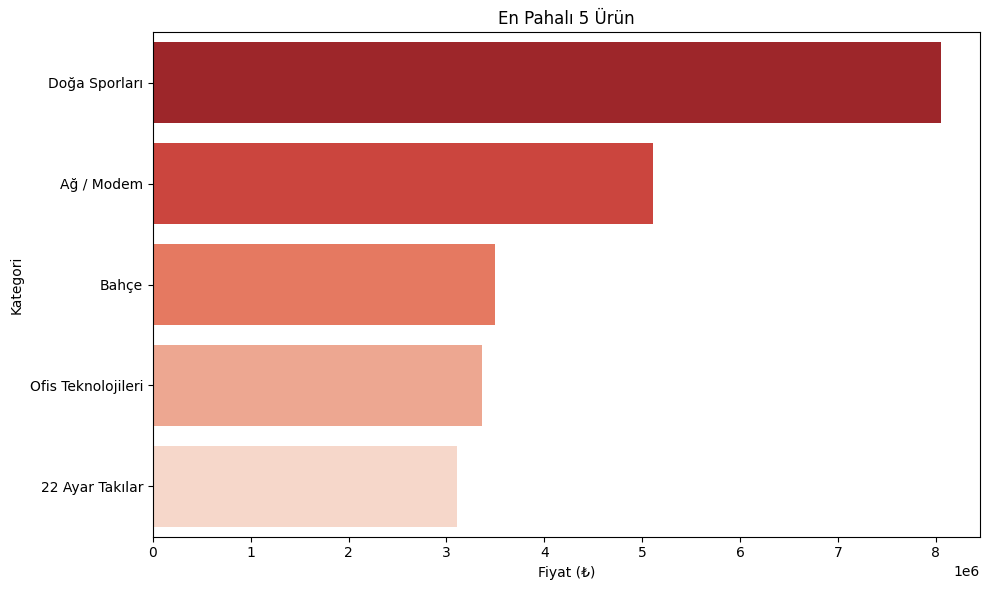


--- En Pahalı 5 Ürün Bilgisi ---
Doğa Sporları - 8049204.26₺
Başlık: []
URL   : https://www.hepsiburada.com/seabreacher-z-pm-HBC00004WCP2T
--------------------------------------------------------------------------------
Ağ / Modem - 5115000.0₺
Başlık: []
URL   : https://www.hepsiburada.com/tronx-t-iq-pb-1-pm-HBC00005X7ONV
--------------------------------------------------------------------------------
Bahçe - 3500000.0₺
Başlık: ['tohum', 'atma', 'makinası']
URL   : https://www.hepsiburada.com/ozmaktohum-atma-makinasi-pm-HBC00008J6SQM
--------------------------------------------------------------------------------
Ofis Teknolojileri - 3366870.0₺
Başlık: ['ideal', 'evrak', 'imha', 'makinesi']
URL   : https://www.hepsiburada.com/ideal-5009-cc-p2-evrak-imha-makinesi-pm-HBC00008PNCBS
--------------------------------------------------------------------------------
22 Ayar Takılar - 3112469.16₺
Başlık: ['kulplu', 'ziynet', 'altın', 'adet']
URL   : https://www.hepsiburada.com/gekas-kuyumculuk

In [32]:
# --- GRAFİK: En pahalı 5 ürün ---
plt.figure(figsize=(10, 6))
sns.barplot(data=top5_products, x='price', y='supercategory', palette='Reds_r')
plt.title('En Pahalı 5 Ürün')
plt.xlabel('Fiyat (₺)')
plt.ylabel('Kategori')
plt.tight_layout()
plt.show()

# Ürün başlıklarını ve URL'lerini yazdır
print("\n--- En Pahalı 5 Ürün Bilgisi ---")
for i, row in top5_products.iterrows():
    print(f"{row['supercategory']} - {row['price']}₺")
    print(f"Başlık: {row['title']}")
    print(f"URL   : {row['product_url']}")
    print("-" * 80)

C:\Users\kurt_\AppData\Local\Temp\ipykernel_21328\2893711338.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom5_products, x='price', y='supercategory', palette='Greens')


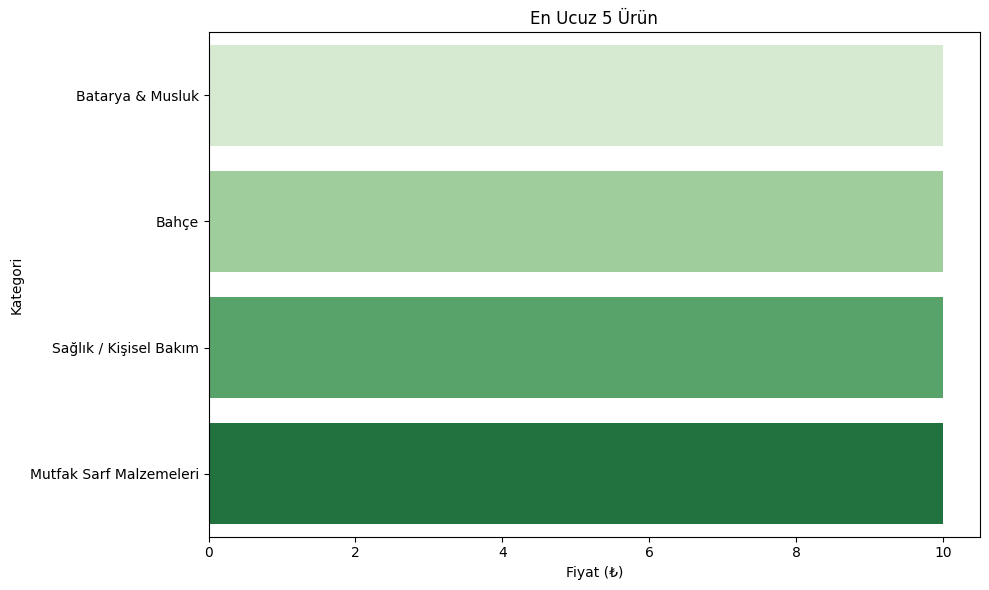


--- En Ucuz 5 Ürün Bilgisi ---
Batarya & Musluk - 10.0₺
Başlık: ['boya', 'süzgeci', 'mikron', 'adet']
URL   : https://www.hepsiburada.com/her-sey-evinizde-boya-suzgeci-190-mikron-adet-9996669948573-pm-HBC00005Z9UI3
--------------------------------------------------------------------------------
Bahçe - 10.0₺
Başlık: ['damlama', 'sulama', 'dirsek']
URL   : https://www.hepsiburada.com/serdrip-damlama-sulama-dirsek-16mm-pm-HBC00003G34YQ
--------------------------------------------------------------------------------
Sağlık / Kişisel Bakım - 10.0₺
Başlık: ['yeşil', 'enjektör']
URL   : https://www.hepsiburada.com/inmedsan-2-cc-yesil-enjektor-pm-HBC00001V3WVB
--------------------------------------------------------------------------------
Mutfak Sarf Malzemeleri - 10.0₺
Başlık: ['çay', 'poşeti']
URL   : https://adservice.hepsiburada.com/event/api/v1/track?event=aVgrWmZRTEVVZnA4aWRGaVkwUVRQRUxJNXhWSHI4TC9iSlJETzVTQWRNSU5kcmROSGlpaWpIay9oRUFEc1dvaERlaDBlTk0rMXZKSEJIMnhXbmRGWTJlYi9aa3lZWGtkOHg

In [33]:
# --- GRAFİK: En ucuz 5 ürün ---
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom5_products, x='price', y='supercategory', palette='Greens')
plt.title('En Ucuz 5 Ürün')
plt.xlabel('Fiyat (₺)')
plt.ylabel('Kategori')
plt.tight_layout()
plt.show()

# Ürün başlıklarını ve URL'lerini yazdır
print("\n--- En Ucuz 5 Ürün Bilgisi ---")
for i, row in bottom5_products.iterrows():
    print(f"{row['supercategory']} - {row['price']}₺")
    print(f"Başlık: {row['title']}")
    print(f"URL   : {row['product_url']}")
    print("-" * 80)

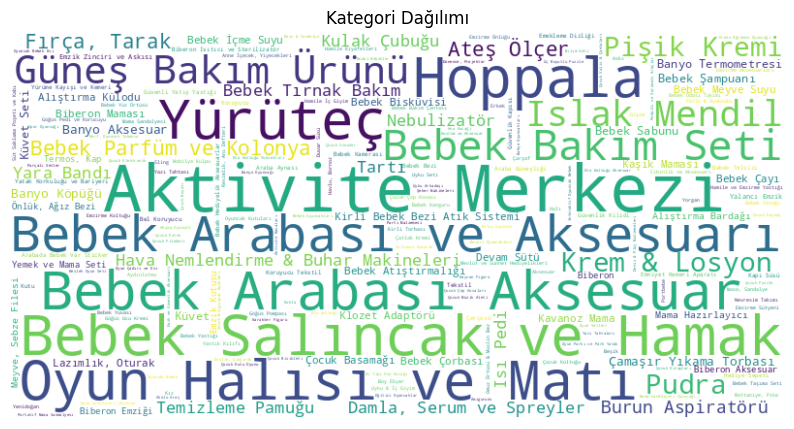

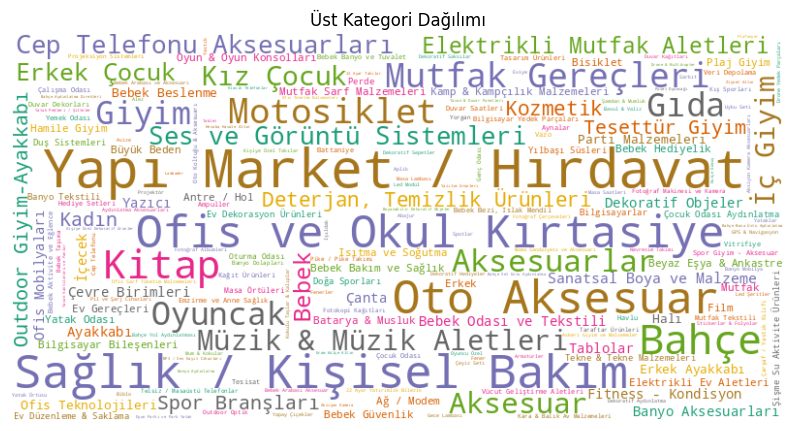

In [34]:
# Her kategori kaç kere geçiyor (frekans hesabı)
category_freq = {cat: 1 for cat in df['category'].dropna().unique()}
supercategory_freq = df['supercategory'].dropna().value_counts().to_dict()

# WordCloud – Category
plt.figure(figsize=(10, 6))
wordcloud_category = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(category_freq)
plt.imshow(wordcloud_category, interpolation='bilinear')
plt.axis('off')
plt.title("Kategori Dağılımı")
plt.show()

# WordCloud – Supercategory
plt.figure(figsize=(10, 6))
wordcloud_super = WordCloud(width=800, height=400, background_color='white', colormap='Dark2').generate_from_frequencies(supercategory_freq)
plt.imshow(wordcloud_super, interpolation='bilinear')
plt.axis('off')
plt.title("Üst Kategori Dağılımı")
plt.show()

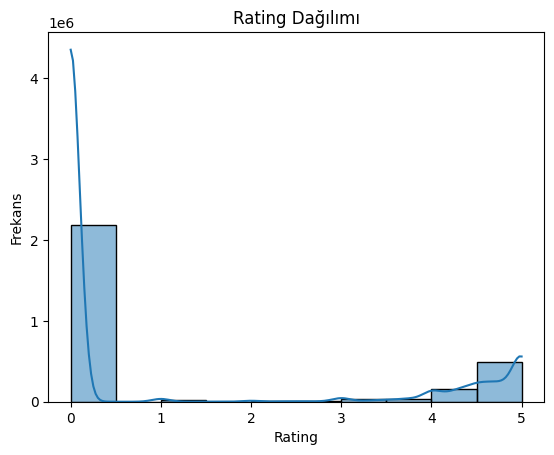

In [35]:
sns.histplot(df['rating'], bins=10, kde=True)
plt.title("Rating Dağılımı")
plt.xlabel("Rating")
plt.ylabel("Frekans")
plt.show()

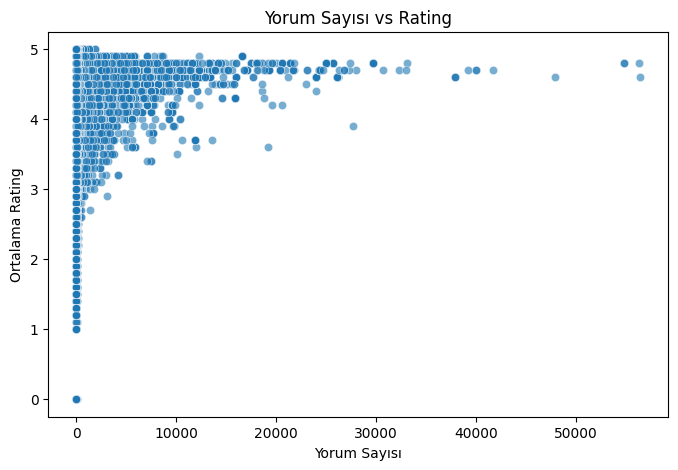

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='evaluation', y='rating', alpha=0.6)
plt.title("Yorum Sayısı vs Rating")
plt.xlabel("Yorum Sayısı")
plt.ylabel("Ortalama Rating")
plt.show()

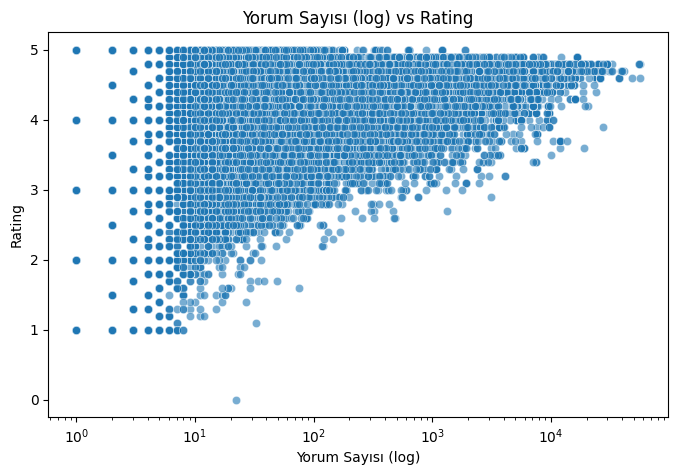

In [37]:
# bazı ürünlerde yorum sayısı fazla olabileceği için
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='evaluation', y='rating', alpha=0.6)
plt.xscale('log')
plt.title("Yorum Sayısı (log) vs Rating")
plt.xlabel("Yorum Sayısı (log)")
plt.ylabel("Rating")
plt.show()

In [38]:
df['product_url'] = df['product_url'].apply(lambda x: x[0] if isinstance(x, list) else x)
df['product_url'] = df['product_url'].str.strip()

# -----------------------------------------------
MAX_FEATURES = 10_000
N_COMPONENTS = 100
BATCH_SIZE = 10_000

print(f"Toplam ürün sayısı: {len(df)}")

tfidf = TfidfVectorizer(max_features=MAX_FEATURES)
tfidf.fit(df['Bow'])

sample_size = min(100_000, len(df))
sample_texts = df['Bow'].sample(sample_size, random_state=42).tolist()
tfidf_sample = tfidf.transform(sample_texts)

svd = TruncatedSVD(n_components=N_COMPONENTS, random_state=42)
svd.fit(tfidf_sample)

d = N_COMPONENTS
nlist = 100
quantizer = faiss.IndexFlatIP(d)
index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_INNER_PRODUCT)

sample_reduced = svd.transform(tfidf_sample).astype(np.float32)
faiss.normalize_L2(sample_reduced)

print("Index training...")
index.train(sample_reduced)
print("Index training tamamlandı!")

for start in range(0, len(df), BATCH_SIZE):
    end = min(start + BATCH_SIZE, len(df))
    batch_texts = df['Bow'].iloc[start:end].tolist()
    
    tfidf_batch = tfidf.transform(batch_texts)
    svd_batch = svd.transform(tfidf_batch).astype(np.float32)
    faiss.normalize_L2(svd_batch)
    
    index.add(svd_batch)
print("Tüm veri Faiss indexine eklendi!")

Toplam ürün sayısı: 2934984
Index training...
Index training tamamlandı!
Tüm veri Faiss indexine eklendi!


In [39]:
def recommend(user_input, min_price=0, max_price=1e6, top_n=5):
    input_tfidf = tfidf.transform([user_input])
    input_svd = svd.transform(input_tfidf).astype(np.float32)
    faiss.normalize_L2(input_svd)

    D, I = index.search(input_svd, top_n * 3)

    results_df = df.iloc[I[0]].copy()
    results_df['score'] = D[0]
    results_df = results_df[(results_df['price'] >= min_price) & (results_df['price'] <= max_price)]

    results_df = results_df.sort_values(by='score', ascending=False).head(top_n)

    results = []
    for _, row in results_df.iterrows():
        results.append({
            "model": row['title'],
            "price": row['price'],
            "rating": row.get('rating', 'N/A'),
            "category": ' '.join(row['category']) if isinstance(row['category'], list) else row['category'],
            "supercategory": ' '.join(row['supercategory']) if isinstance(row['supercategory'], list) else row['supercategory'],
            "product_url": row['product_url'] if isinstance(row['product_url'], str) else '',
            "score": round(row['score'], 4)
        })
    
    return results

In [42]:
query = "bebek puseti"
min_price = 500
max_price = 2000

recommendations = recommend(query, min_price, max_price, top_n=5)
for r in recommendations:
    print(r)

{'model': ['uzaylı', 'hayvanlar', 'bebek', 'kozmonot'], 'price': 1249.0, 'rating': 0.0, 'category': 'Kozmonot', 'supercategory': 'Bebek', 'product_url': 'https://www.hepsiburada.com/puppis-baby-uzayli-hayvanlar-bebek-kozmonot-p-HBCV00004Y5YW9', 'score': 0.9998}
{'model': ['gezegen', 'kundak', 'bebek', 'kozmonot'], 'price': 1249.0, 'rating': 0.0, 'category': 'Kozmonot', 'supercategory': 'Bebek', 'product_url': 'https://www.hepsiburada.com/puppis-baby-gezegen-kundak-bebek-kozmonot-p-HBCV00004Y5XO3', 'score': 0.9994}
{'model': ['bebek', 'kundağı'], 'price': 550.0, 'rating': 0.0, 'category': 'Kundak', 'supercategory': 'Bebek', 'product_url': 'https://www.hepsiburada.com/bebek-kundagi-pm-HBC00007HA2Y2', 'score': 0.9993}
{'model': ['patikli', 'eldivenli', 'kozmonot', 'somon'], 'price': 1350.0, 'rating': 0.0, 'category': 'Kozmonot', 'supercategory': 'Bebek', 'product_url': 'https://www.hepsiburada.com/patikli-ve-eldivenli-kozmonot-somon-p-HBCV00009FZS9D', 'score': 0.9992}
{'model': ['balance'

### Levent aslan